File: AmpHGT_PeptideMTR_sm_results.csv
AUROC: 0.9518522698118413, AUPRC: 0.9504518401092039
F1: 0.9014653816010019, MCC: 0.7882246620763314, Accuracy: 0.8863636363636364
File: AmpHGT_PeptideMLM-MTR_sm_results.csv
AUROC: 0.9532282434008936, AUPRC: 0.9550366775974792
F1: 0.8895460030206723, MCC: 0.7585701123880734, Accuracy: 0.8766511266511267
File: AmpHGT_PeptideMLM_base_results.csv
AUROC: 0.9588430204133004, AUPRC: 0.9592808597415247
F1: 0.896918167167399, MCC: 0.7761577133192076, Accuracy: 0.8869463869463869
File: AmpHGT_PeptideMTR_base_results.csv
AUROC: 0.9795337543142882, AUPRC: 0.981262030651403
F1: 0.9270290344639563, MCC: 0.8474469518517155, Accuracy: 0.9238539238539238
File: AmpHGT_PeptideMLM_sm_results.csv
AUROC: 0.9537029361364306, AUPRC: 0.9517307753065625
F1: 0.9079475932701915, MCC: 0.8003711399871771, Accuracy: 0.8976301476301476
File: AmpHGT_PeptideMLM-MTR_base_results.csv
AUROC: 0.9728484226526157, AUPRC: 0.975671620541346
F1: 0.9124201021231868, MCC: 0.8110236013519821

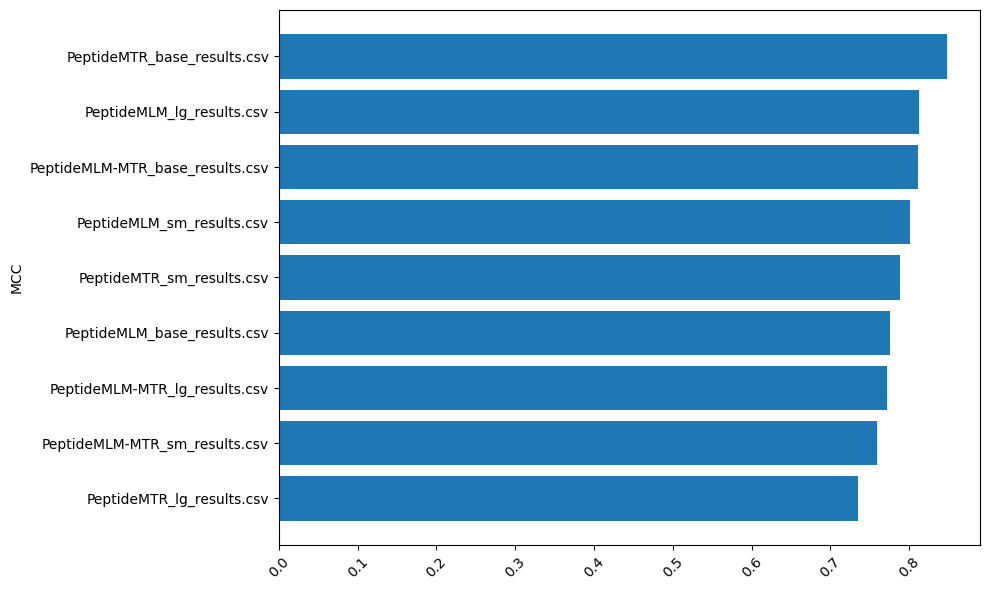

In [37]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
# load files from ../results
import os
import pandas as pd

files = os.listdir("../results")

aucs = []
prcs = []
mccs = []

for file in files:
    if "AmpHGT" in file and file.endswith(".csv"):
        df = pd.read_csv(os.path.join("../results", file))
    
        # calculate auroc and auprc for each dataframe
        y_true = df['true_label']
        y_scores = df['predicted_label']
        auroc = roc_auc_score(y_true, y_scores)
        auprc = average_precision_score(y_true, y_scores)

        # do mcc and accuracy at best threshold
        precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
        best_threshold = thresholds[np.argmax(f1_scores[:-1])]
        y_pred = (y_scores >= best_threshold).astype(int)
        mcc = matthews_corrcoef(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        print(f"File: {file}\nAUROC: {auroc}, AUPRC: {auprc}\nF1: {f1_scores.max()}, MCC: {mcc}, Accuracy: {accuracy}")

        aucs.append(auroc)
        prcs.append(auprc)
        mccs.append(mcc)

        # # plot precision-recall curve and scatter plot of true vs predicted
        # plt.figure()
        # plt.plot(recall, precision, label='Precision-Recall curve')
        # plt.xlabel('Recall')
        # plt.ylabel('Precision')
        # plt.title(f'Precision-Recall Curve for {file}')
        # plt.legend()
        # plt.show()

        # plt.figure()
        # plt.scatter(y_true, y_scores, alpha=0.5)
        # plt.xlabel('True Labels')
        # plt.ylabel('Predicted Scores')
        # plt.title(f'True vs Predicted for {file}')
        # plt.show()

        # # plot auroc curve
        # from sklearn.metrics import roc_curve
        # fpr, tpr, _ = roc_curve(y_true, y_scores)
        # plt.figure()
        # plt.plot(fpr, tpr, label='ROC curve')
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.title(f'ROC Curve for {file}')
        # plt.legend()
        # plt.show()


# make barplot of mcc across files
plt.figure(figsize=(10, 6))
# sort by mcc
files = [f for f in files if "AmpHGT" in f and f.endswith(".csv")]
mccs, files = zip(*sorted(zip(mccs, files)))
plt.barh(range(len(mccs)), mccs, tick_label=[f.replace('AmpHGT_', '') for f in files])
plt.ylabel('MCC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

File: CellPPD_PeptideMLM-MTR_sm_results.csv
AUROC: 0.967264, AUPRC: 0.9684268852515066
F1: 0.9184491928609984, MCC: 0.8373452423281332, Accuracy: 0.9186666666666666
File: CellPPD_PeptideMTR_sm_results.csv
AUROC: 0.9730435555555556, AUPRC: 0.9780216839991661
F1: 0.9264604761044392, MCC: 0.8588807125127561, Accuracy: 0.9286666666666666
File: CellPPD_PeptideMTR_base_results.csv
AUROC: 0.9721848888888889, AUPRC: 0.9787200210430688
F1: 0.933333328342014, MCC: 0.8748038657565895, Accuracy: 0.936
File: CellPPD_PeptideMTR_lg_results.csv
AUROC: 0.9701973333333335, AUPRC: 0.976859286327587
F1: 0.9251887389988643, MCC: 0.8560748313627049, Accuracy: 0.9273333333333333
File: CellPPD_PeptideMLM_sm_results.csv
AUROC: 0.9751733333333334, AUPRC: 0.9820789959956671
F1: 0.9390243852452246, MCC: 0.8804509063256237, Accuracy: 0.94
File: CellPPD_PeptideMLM_base_results.csv
AUROC: 0.9631502222222221, AUPRC: 0.9709611015737608
F1: 0.9207650223254278, MCC: 0.8463088433386466, Accuracy: 0.9226666666666666
File:

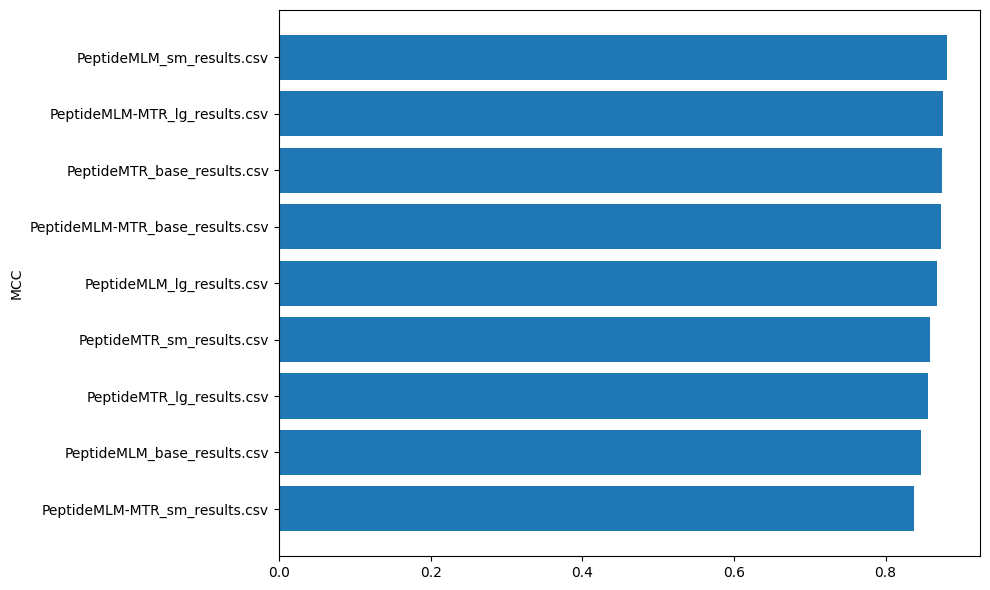

In [39]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
# load files from ../results
import os
import pandas as pd



files = os.listdir("../results")

aucs = []
prcs = []
mccs = []

for file in files:
    if "CellPPD" in file and file.endswith(".csv"):
        df = pd.read_csv(os.path.join("../results", file))
    
        # calculate auroc and auprc for each dataframe
        y_true = df['true_label']
        y_scores = df['predicted_label']
        auroc = roc_auc_score(y_true, y_scores)
        auprc = average_precision_score(y_true, y_scores)

        # do mcc and accuracy at best threshold
        precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
        best_threshold = thresholds[np.argmax(f1_scores[:-1])]
        y_pred = (y_scores >= best_threshold).astype(int)
        mcc = matthews_corrcoef(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        print(f"File: {file}\nAUROC: {auroc}, AUPRC: {auprc}\nF1: {f1_scores.max()}, MCC: {mcc}, Accuracy: {accuracy}")
        aucs.append(auroc)
        prcs.append(auprc)
        mccs.append(mcc)
        # # plot precision-recall curve and scatter plot of true vs predicted
        # import matplotlib.pyplot as plt
        # plt.figure()
        # plt.plot(recall, precision, label='Precision-Recall curve')
        # plt.xlabel('Recall')
        # plt.ylabel('Precision')
        # plt.title(f'Precision-Recall Curve for {file}')
        # plt.legend()
        # plt.show()

        # plt.figure()
        # plt.scatter(y_true, y_scores, alpha=0.5)
        # plt.xlabel('True Labels')
        # plt.ylabel('Predicted Scores')
        # plt.title(f'True vs Predicted for {file}')
        # plt.show()

        # # plot auroc curve
        # from sklearn.metrics import roc_curve
        # fpr, tpr, _ = roc_curve(y_true, y_scores)
        # plt.figure()
        # plt.plot(fpr, tpr, label='ROC curve')
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.title(f'ROC Curve for {file}')
        # plt.legend()
        # plt.show()

# make barplot of mcc across files
plt.figure(figsize=(10, 6))
# sort by mcc
files = [f for f in files if "CellPPD" in f and f.endswith(".csv")]
mccs, files = zip(*sorted(zip(mccs, files)))
plt.barh(range(len(mccs)), mccs, tick_label=[f.replace('CellPPD_', '') for f in files])
plt.ylabel('MCC')
plt.tight_layout()
plt.show()

In [40]:
# do it now with MHC

from sklearn.metrics import mean_squared_error, r2_score


files = os.listdir("../results")
for file in files:
    if "MHC" in file and file.endswith(".csv"):
        df = pd.read_csv(os.path.join("../results", file))
    
        # calculate auroc and auprc for each dataframe
        y_true = df['true_label']
        y_scores = df['predicted_label']
        # calculate r2 and rmse
        r2 = r2_score(y_true, y_scores)
        rmse = mean_squared_error(y_true, y_scores)
        print(f"File: {file}\nR2: {r2}, RMSE: {rmse}")
        
        # # plot precision-recall curve and scatter plot of true vs predicted
        # import matplotlib.pyplot as plt
        # plt.figure()
        # plt.plot(recall, precision, label='Precision-Recall curve')
        # plt.xlabel('Recall')
        # plt.ylabel('Precision')
        # plt.title(f'Precision-Recall Curve for {file}')
        # plt.legend()
        # plt.show()

        # plt.figure()
        # plt.scatter(y_true, y_scores, alpha=0.5)
        # plt.xlabel('True Labels')
        # plt.ylabel('Predicted Scores')
        # plt.title(f'True vs Predicted for {file}')
        # plt.show()

        # # plot auroc curve
        # from sklearn.metrics import roc_curve
        # fpr, tpr, _ = roc_curve(y_true, y_scores)
        # plt.figure()
        # plt.plot(fpr, tpr, label='ROC curve')
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.title(f'ROC Curve for {file}')
        # plt.legend()
        # plt.show()

File: MHC_PeptideMTR_sm_results.csv
R2: -0.2938418500537756, RMSE: 144417223.86010835
File: MHC_PeptideMTR_base_results.csv
R2: -0.2812719764738605, RMSE: 143014188.20578283
File: MHC_PeptideMLM_sm_results.csv
R2: -0.2941917742060354, RMSE: 144456282.01441738
File: MHC_PeptideMTR_lg_results.csv
R2: -0.26696786225664537, RMSE: 141417578.49266973
File: MHC_PeptideMLM_base_results.csv
R2: -0.28483272026945006, RMSE: 143411634.565873
File: MHC_PeptideMLM-MTR_sm_results.csv
R2: -0.29349117045595774, RMSE: 144378081.3837855
File: MHC_PeptideMLM-MTR_base_results.csv
R2: -0.28097631068798834, RMSE: 142981186.3114754
File: MHC_PeptideMLM_lg_results.csv
R2: -0.27347890119823837, RMSE: 142144333.5967428
File: MHC_PeptideMLM-MTR_lg_results.csv
R2: -0.2693348274536722, RMSE: 141681776.58049157


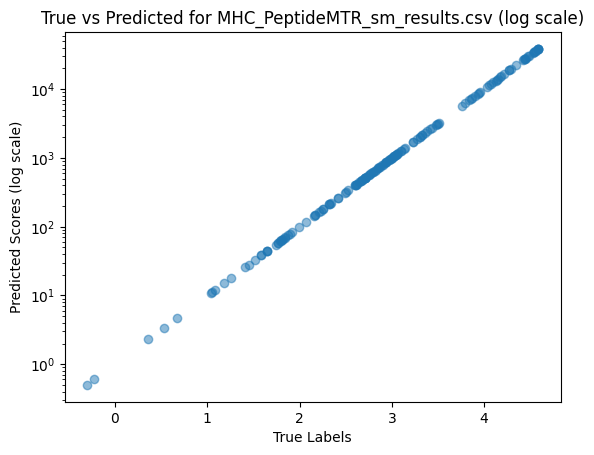

In [51]:
# plot true vs true with log transformed on y axis
files = os.listdir("../results")
for file in files:
    if "MHC" in file and file.endswith(".csv"):
        df = pd.read_csv(os.path.join("../results", file))
        y_true = df['true_label']
        y_true_log = df['true_label'].apply(lambda x: np.log10(x + 1e-8))



        import matplotlib.pyplot as plt
        plt.figure()
        plt.scatter(y_true_log, y_true, alpha=0.5)
        plt.yscale('log')
        plt.xlabel('True Labels')
        plt.ylabel('Predicted Scores (log scale)')
        plt.title(f'True vs Predicted for {file} (log scale)')
        plt.show()

        break

In [52]:
# load ../data/MHC_train_original.csv and convert Quantitative Measurement to log scale and resave column 'label' as MHC_train.csv

import pandas as pd
df = pd.read_csv("../data/MHC_train_original.csv")
df['label'] = df['Quantitative Measurement'].apply(lambda x: np.log10(x + 1e-8))
df.to_csv("../data/MHC_train.csv", index=False)

File: THPep_PeptideMTR_sm_results.csv
AUROC: 0.9439035271887466, AUPRC: 0.8726146270901888
F1: 0.8186813136867529, MCC: 0.7423379381310883, Accuracy: 0.8916256157635468
File: THPep_PeptideMTR_base_results.csv
AUROC: 0.9389959059416334, AUPRC: 0.8744885576531968
F1: 0.8140161675198525, MCC: 0.7348499672362749, Accuracy: 0.8866995073891626
File: THPep_PeptideMLM_sm_results.csv
AUROC: 0.9387334663027503, AUPRC: 0.8660726233976385
F1: 0.8057970964513338, MCC: 0.7293865369268027, Accuracy: 0.8899835796387521
File: THPep_PeptideMTR_lg_results.csv
AUROC: 0.9343113583875707, AUPRC: 0.8581498215171195
F1: 0.7765957397012223, MCC: 0.6803158055724269, Accuracy: 0.8620689655172413
File: THPep_PeptideMLM_base_results.csv
AUROC: 0.9472233886206173, AUPRC: 0.8738801001145045
F1: 0.8270270220388605, MCC: 0.7536499224627982, Accuracy: 0.8949096880131363
File: THPep_PeptideMLM_lg_results.csv
AUROC: 0.932264329204283, AUPRC: 0.8089197011239275
F1: 0.8118279520036998, MCC: 0.7316189605763215, Accuracy: 0.

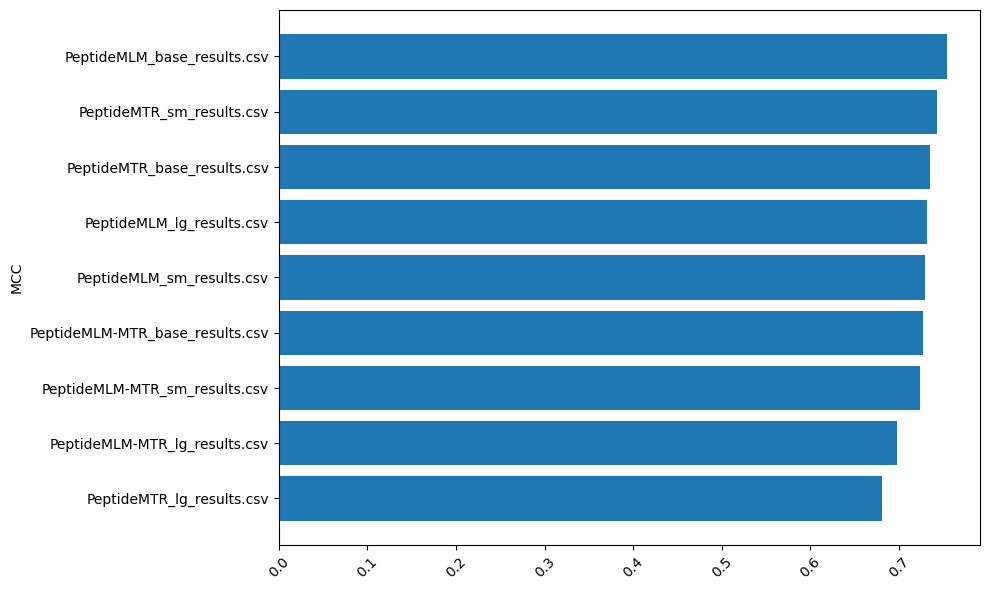

In [44]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
# load files from ../results
import os
import pandas as pd

files = os.listdir("../results")

aucs = []
prcs = []
mccs = []

for file in files:
    if "THPep" in file and file.endswith(".csv"):
        df = pd.read_csv(os.path.join("../results", file))
    
        # calculate auroc and auprc for each dataframe
        y_true = df['true_label']
        y_scores = df['predicted_label']
        auroc = roc_auc_score(y_true, y_scores)
        auprc = average_precision_score(y_true, y_scores)

        # do mcc and accuracy at best threshold
        precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
        best_threshold = thresholds[np.argmax(f1_scores[:-1])]
        y_pred = (y_scores >= best_threshold).astype(int)
        mcc = matthews_corrcoef(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        print(f"File: {file}\nAUROC: {auroc}, AUPRC: {auprc}\nF1: {f1_scores.max()}, MCC: {mcc}, Accuracy: {accuracy}")

        aucs.append(auroc)
        prcs.append(auprc)
        mccs.append(mcc)

        # # plot precision-recall curve and scatter plot of true vs predicted
        # plt.figure()
        # plt.plot(recall, precision, label='Precision-Recall curve')
        # plt.xlabel('Recall')
        # plt.ylabel('Precision')
        # plt.title(f'Precision-Recall Curve for {file}')
        # plt.legend()
        # plt.show()

        # plt.figure()
        # plt.scatter(y_true, y_scores, alpha=0.5)
        # plt.xlabel('True Labels')
        # plt.ylabel('Predicted Scores')
        # plt.title(f'True vs Predicted for {file}')
        # plt.show()

        # # plot auroc curve
        # from sklearn.metrics import roc_curve
        # fpr, tpr, _ = roc_curve(y_true, y_scores)
        # plt.figure()
        # plt.plot(fpr, tpr, label='ROC curve')
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.title(f'ROC Curve for {file}')
        # plt.legend()
        # plt.show()


# make barplot of mcc across files
plt.figure(figsize=(10, 6))
# sort by mcc
files = [f for f in files if "THPep" in f and f.endswith(".csv")]
mccs, files = zip(*sorted(zip(mccs, files)))
plt.barh(range(len(mccs)), mccs, tick_label=[f.replace('THPep_', '') for f in files])
plt.ylabel('MCC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()